<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Modelling Ames Housing Data and Kaggle Challenge  
## PART 1/2: Data Cleaning and Visualisation

----

## Project Statement:

**The client**: An owner of an up and coming property agency interested to break into the property market in Ames, Iowa.  

**Task**: Prepare a preliminary study of the market to evaluate feasibility of the business expansion. Will derive insights from the dataset through graphical visualizations and Linear Regression modelling. The best model that can best predict sales prices will be determined by RMSE and R2 Scores. 

**Objectives of the study**:
1) Provide an overview of the locale and general trends in the Ames residential property market. 
2) Identify the top predictors of residential property Sale Price in Ames

The results of this study will help the client evaluate if the company's current expertise and specialization is a good match to perform well in the Ames residential property market. 


## Background:

Ames is a city in Story County, Iowa, United States, located approximately 30 miles (48 km) north of Des Moines in central Iowa. It is best known as the home of Iowa State University (ISU), with leading agriculture, design, engineering, and veterinary medicine colleges. 

According to the 2020 census, Ames had a population of 66,427, making it the state's ninth largest city. Iowa State University was home to 33,391 students as of fall 2019, which make up approximately one half of the city's population. [[Wikipedia]](https://en.wikipedia.org/wiki/Ames,_Iowa)

Ames is a tight-knit city anchored by Iowa State University, and is ranked as one of the nation’s top college towns and earned the #33 spot on Livability’s list of the Top 100 Best Places to Live in 2022. It’s a top city for entrepreneurs thanks to its proximity to the research university, affordable living costs and its high-wage job growth. [[Livability]](https://livability.com/best-places/10-awesome-cities-with-little-to-no-traffic-yes-really/ames-ia/)



<img src="../images/AmesMap.png"
     alt="Map"
     style="float: left; margin-right: 10px;" />

Image from: https://bestneighborhood.org/best-neighborhoods-ames-ia/

## The dataset:

The dataset used is a collection of 2032 observations (after cleaning) of properties sold in Ames, Iowa between 2006-2010. 

51% of the properties sold in this dataset are 1-story Houses, 29% are 2-story houses and 10% are 1.5 story houses (with finished 2nd level). 

In terms of general zoning classification, 78% of the houses sold were in low-density residential areas while 15% were in medium-density residential areas. 

There are nearly 80 variables in this dataset that describe property features, but for a preliminary analysis we will only zoom into the top few predictors of Sale Price. 

While the distribution of property Sale Prices in Ames tends to skew to the left (towards lower-priced homes), the distribution of price per sqft of above ground living area is normally distributed with a mean of $121.13 psf. 

For more details on the dataset, please refer to the documentation here: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

## Workflow

### Contents:
1) Data import and cleaning
2) Exploratory Data Analysis (EDA)
3) Hypothesis Testing
4) Modelling with Linear Regression
5) Conclusion
6) Proposed Future Improvements

### 2. Data Importing and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
train = pd.read_csv("../dataset/train.csv")
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
train.shape

(2051, 81)

In [4]:
test = pd.read_csv("../dataset/test.csv")
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
test.shape

(878, 80)

#### Functions for single histogram, scatter plot, and boxplot:

In [6]:
def histogram_gen(df, col,title):
    plt.figure(figsize=(12,3))
    plt.hist(data=df, x=col,bins=20,color="skyblue")
    plt.axvline(df[col].median(), color='blue', linestyle='dashed', linewidth=3, label='median')
    plt.axvline(df[col].mean(), color='black', linewidth=3, label='mean')
    plt.axvline(df[col].mean()+(3*df[col].std()), color='red', linestyle=':', linewidth=2, label='outlier')
    plt.axvline(df[col].mean()-(3*df[col].std()), color='red', linestyle=':', linewidth=2, label='outlier')
    plt.title(title,fontsize=16,fontweight="heavy",pad=10)
    plt.ylabel("Frequency", fontsize = 12)
    plt.xlabel(col, fontsize = 12)
    return

In [7]:
def create_scatter_plot(x,y,title,y_lab,x_lab):
    plt.scatter(x,y)
    plt.title(title, fontsize = 20)
    plt.ylabel(y_lab, fontsize = 12)
    plt.xlabel(x_lab, fontsize = 12)
    m, b = np.polyfit(x,y, 1)
    plt.plot(x, m*x+b, color = "red")
    return

In [8]:
def boxplot(df,col):
    plt.figure(figsize=(12,2))
    sns.boxplot(data=df, x=col, palette="Blues", orient="h")
    plt.axvline(df[col].mean()+(3*df[col].std()), color='red',linestyle=':', 
                                                                linewidth=2, 
                                                                label='stddev')
    plt.axvline(df[col].mean()-(3*df[col].std()), color='red', linestyle=':', 
                                                                linewidth=2,
                                                                label='stddev')
    plt.ylabel("", fontsize = 12);
    return

#### Creating data dictionary

In [9]:
desc = pd.read_csv('../dataset/desc.csv')
desc.head()


,Order (Discrete): Observation number
0,PID (Nominal): Parcel identification number -...
1,MS SubClass (Nominal): Identifies the type of ...
2,020 1-STORY 1946 & NEWER ALL STYLES
3,030 1-STORY 1945 & OLDER
4,040 1-STORY W/FINISHED ATTIC ALL AGES


In [10]:
new_desc = [i.split(":") for i in desc["Order (Discrete): Observation number"] if ("(" in i) and (":" in i)]
desc_details = [new_desc[a][1] for a in range(len(new_desc))]
desc_wip = [new_desc[a][0] for a in range(len(new_desc))]
desc_type = [desc_wip[b].split("(")[1].replace(")","") for b in range(len(new_desc))]
desc_index = [desc_wip[b].replace(f" ({desc_type[b]})","") for b in range(len(new_desc))]
doc_dict = {desc_wip[b].replace(f" ({desc_type[b]})","")
                                    :desc_wip[b].split("(")[1].replace(")","") 
                                    for b in range(len(new_desc))}
    
col_map = {i:j for i,j in zip(desc_index,train.iloc[:,1:].columns)}

new_doc = pd.DataFrame.from_dict(doc_dict, orient="index")
new_doc["ID"] = new_doc.index.map(col_map)
new_doc.rename(columns={0:"class"},inplace=True)
new_doc["class"] = new_doc["class"].map(lambda x: x.replace(" ",""))
new_doc.set_index("ID", drop=True,inplace=True)
new_doc.iloc[-1,0]="Continuous" #to correct the class of SalesPrice

new_doc.head()


,class
ID,
PID,Nominal
MS SubClass,Nominal
MS Zoning,Nominal
Lot Frontage,Continuous
Lot Area,Continuous


In [11]:
def null_check(df):
    df_null = pd.DataFrame(df.isnull().sum()).rename(columns = {0:"null_count"})
    df_dtype = pd.DataFrame(df.dtypes).rename(columns = {0:"dtype"})
    df_null.head()
    df_check = df_null.merge(df_dtype,left_index=True, right_index=True)
    return df_check

train_check = null_check(train)  
test_check = null_check(test)

In [12]:
def final_col_check_func(train_check,test_check,new_doc):
    col_check = test_check.merge(train_check, left_index=True, right_index=True, how = "outer", suffixes = ('_test','_train'))
    col_check["null_ratio_train"] = col_check["null_count_train"]/train.shape[0]
    col_check["null_ratio_test"] = col_check["null_count_test"]/test.shape[0]
    col_check["eq_dtype"] = col_check["dtype_test"]==col_check["dtype_train"]
    final_col_check = col_check.merge(new_doc,left_index=True, right_index=True)
    return final_col_check

final_col_check = final_col_check_func(train_check,test_check,new_doc)

In [13]:
final_col_check.head()

,null_count_test,dtype_test,null_count_train,dtype_train,null_ratio_train,null_ratio_test,eq_dtype,class
1st Flr SF,0.0,int64,0,int64,0.000000,0.000000,True,Continuous
2nd Flr SF,0.0,int64,0,int64,0.000000,0.000000,True,Continuous
3Ssn Porch,0.0,int64,0,int64,0.000000,0.000000,True,Continuous
Alley,820.0,object,1911,object,0.931741,0.933941,True,Nominal
Bedroom AbvGr,0.0,int64,0,int64,0.000000,0.000000,True,Discrete


In [14]:
final_col_check.to_csv('../dataset/col_check.csv')

In [15]:
final_col_check.loc[:,["class","dtype_train"]].value_counts()

class       dtype_train
Nominal     object         21
Ordinal     object         21
Continuous  int64          13
Discrete    int64          10
Continuous  float64         7
Discrete    float64         4
Nominal     int64           2
Ordinal     int64           2
dtype: int64

In [16]:
final_col_check[(final_col_check["class"]=="Nominal")&(final_col_check["dtype_train"]=="int64")]

,null_count_test,dtype_test,null_count_train,dtype_train,null_ratio_train,null_ratio_test,eq_dtype,class
MS SubClass,0.0,int64,0,int64,0.0,0.0,True,Nominal
PID,0.0,int64,0,int64,0.0,0.0,True,Nominal


**MS SubClass and PID are identifiers, so ok to leave as Nominal with int64 type**

In [17]:
train["PID"].value_counts().sum()

2051

In [18]:
train["MS SubClass"].value_counts()

20     770
60     394
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
180     11
45      11
40       4
150      1
Name: MS SubClass, dtype: int64

**Reformating MS Subclass to string**

In [19]:
remap = {i:(f"0{str(i)}" if len(str(i))<3 else str(i)) for i in train["MS SubClass"]}
remap

{60: '060',
 20: '020',
 50: '050',
 180: '180',
 160: '160',
 70: '070',
 120: '120',
 190: '190',
 85: '085',
 30: '030',
 90: '090',
 80: '080',
 75: '075',
 45: '045',
 40: '040',
 150: '150'}

In [20]:
train["MS SubClass"] = train["MS SubClass"].map(remap)

In [21]:
train["MS SubClass"].value_counts()

020    770
060    394
050    198
120    132
030    101
070     90
160     88
080     86
090     75
190     46
085     28
075     16
180     11
045     11
040      4
150      1
Name: MS SubClass, dtype: int64

In [22]:
final_col_check[(final_col_check["class"]=="Ordinal")&(final_col_check["dtype_train"]=="int64")]

,null_count_test,dtype_test,null_count_train,dtype_train,null_ratio_train,null_ratio_test,eq_dtype,class
Overall Cond,0.0,int64,0,int64,0.0,0.0,True,Ordinal
Overall Qual,0.0,int64,0,int64,0.0,0.0,True,Ordinal


In [23]:
train["Overall Cond"].value_counts().sort_values()

1       4
2       6
9      29
3      35
4      70
8     101
7     270
6     368
5    1168
Name: Overall Cond, dtype: int64

In [24]:
train["Overall Qual"].value_counts().sort_values()

1       4
2       9
10     23
3      29
9      77
4     159
8     250
7     431
6     506
5     563
Name: Overall Qual, dtype: int64

### Columns with significant null count  
Will review these columns with null values by considering the following:
- Do we delete rows?    *Not recommended if large number of rows affected*
- If we choose to fill in those null values?    *If yes, how?*
- Do we delete columns?    *Only if we decide that it's impossible to delete rows or fill in null values, and there is insufficient remaining data to meaningfully train the data*

We will utilize the info in the Documentation to help us evaluate the features in clusters.

In [25]:
final_col_check.loc[final_col_check["null_ratio_train"]>0,:]


,null_count_test,dtype_test,null_count_train,dtype_train,null_ratio_train,null_ratio_test,eq_dtype,class
Alley,820.0,object,1911,object,0.931741,0.933941,True,Nominal
Bsmt Cond,25.0,object,55,object,0.026816,0.028474,True,Ordinal
Bsmt Exposure,25.0,object,58,object,0.028279,0.028474,True,Ordinal
Bsmt Full Bath,0.0,int64,2,float64,0.000975,0.000000,False,Discrete
Bsmt Half Bath,0.0,int64,2,float64,0.000975,0.000000,False,Discrete
Bsmt Qual,25.0,object,55,object,0.026816,0.028474,True,Ordinal
Bsmt Unf SF,0.0,int64,1,float64,0.000488,0.000000,False,Continuous
BsmtFin SF 1,0.0,int64,1,float64,0.000488,0.000000,False,Continuous
BsmtFin SF 2,0.0,int64,1,float64,0.000488,0.000000,False,Continuous
BsmtFin Type 1,25.0,object,55,object,0.026816,0.028474,True,Ordinal


#### Function to replace nulls:

In [26]:
def null_replace_na(dataset, column, output):
    dataset.loc[dataset[column].isnull(),[column]] = output
    return dataset.loc[:,[column]].value_counts()


In [27]:
def null_replace_zero(dataset, column):
    dataset.loc[dataset[column].isnull(),[column]] = 0
    return dataset.loc[:,[column]].value_counts()

#### Null values in Pool QC:

In [28]:
## Pool QC belongs to same cluster as Pool Area
train["Pool Area"].value_counts()

0      2042
519       1
576       1
800       1
228       1
480       1
648       1
738       1
368       1
561       1
Name: Pool Area, dtype: int64

In [29]:
pd.crosstab(train["Pool QC"],train["Pool Area"]) 

Pool Area,228,368,480,519,561,576,648,738,800
Pool QC,,,,,,,,,
Ex,1,0,0,0,0,0,0,0,0
Fa,0,0,0,1,0,0,1,0,0
Gd,0,0,1,0,0,1,0,1,1
TA,0,1,0,0,1,0,0,0,0


In [30]:
pd.crosstab(test["Pool QC"],test["Pool Area"]) 

Pool Area,144,444,512,555
Pool QC,,,,
Ex,1,0,1,1
TA,0,1,0,0


We will input NA for null values in "Pool QC". Logically, we can assume it's "No Pool" because the corresponding Pool Area =0

In [31]:
null_replace_na(train, "Pool QC","No Pool")

Pool QC
No Pool    2042
Gd            4
Fa            2
TA            2
Ex            1
dtype: int64

In [32]:
train.loc[:,["Pool QC","Pool Area"]].value_counts()

Pool QC  Pool Area
No Pool  0            2042
Ex       228             1
Fa       519             1
         648             1
Gd       480             1
         576             1
         738             1
         800             1
TA       368             1
         561             1
dtype: int64

In [33]:
null_replace_na(test, "Pool QC","No Pool")

Pool QC
No Pool    874
Ex           3
TA           1
dtype: int64

#### Null values for Fence

Will assume nulls mean NA, as per documentation

In [34]:
train["Fence"].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

In [35]:
null_replace_na(train, "Fence","No Fence")

Fence   
No Fence    1651
MnPrv        227
GdPrv         83
GdWo          80
MnWw          10
dtype: int64

In [36]:
null_replace_na(test, "Fence","No Fence")

Fence   
No Fence    706
MnPrv       103
GdPrv        35
GdWo         32
MnWw          2
dtype: int64

#### Null Values for Misc Features

Again, we check the documentation to identify that NA is the only missing category. 
We assume that the null values should be filled with NA

In [37]:
train["Misc Feature"].value_counts()

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: Misc Feature, dtype: int64

In [38]:
null_replace_na(train, "Misc Feature","No Misc Feat")

Misc Feature
No Misc Feat    1986
Shed              56
Gar2               4
Othr               3
Elev               1
TenC               1
dtype: int64

In [39]:
null_replace_na(test, "Misc Feature","No Misc Feat")

Misc Feature
No Misc Feat    837
Shed             39
Gar2              1
Othr              1
dtype: int64

#### Null Values for Basement Features

In [40]:
#Setting up variables for convenience
basement_list = ['Bsmt Cond','Bsmt Exposure','Bsmt Qual','BsmtFin Type 1','BsmtFin Type 2']
all_bsmt = ['Bsmt Cond', 'Bsmt Exposure', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Bsmt Qual', 'Bsmt Unf SF', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Total Bsmt SF']
all_bsmt_filt = all_bsmt+["bsmt_y"]

In [41]:
for col in basement_list:
    print(train.loc[:,[col]].value_counts())
    print(null_replace_na(train, col,"No Bsmt"))
    
#cross check if NA existed before updating nulls. check that number of NA counts tallies with null counts

Bsmt Cond
TA           1834
Gd             89
Fa             65
Po              5
Ex              3
dtype: int64
Bsmt Cond
TA           1834
Gd             89
Fa             65
No Bsmt        55
Po              5
Ex              3
dtype: int64
Bsmt Exposure
No               1339
Av                288
Gd                203
Mn                163
dtype: int64
Bsmt Exposure
No               1339
Av                288
Gd                203
Mn                163
No Bsmt            58
dtype: int64
Bsmt Qual
TA           887
Gd           864
Ex           184
Fa            60
Po             1
dtype: int64
Bsmt Qual
TA           887
Gd           864
Ex           184
Fa            60
No Bsmt       55
Po             1
dtype: int64
BsmtFin Type 1
GLQ               615
Unf               603
ALQ               293
BLQ               200
Rec               183
LwQ               102
dtype: int64
BsmtFin Type 1
GLQ               615
Unf               603
ALQ               293
BLQ               200
Rec     

In [42]:
train.loc[train["Bsmt Cond"]=="No Bsmt",all_bsmt].value_counts()
#expecting 55 observations but 2 missing obs here, likely due to null values in one of the other columns

Bsmt Cond  Bsmt Exposure  Bsmt Full Bath  Bsmt Half Bath  Bsmt Qual  Bsmt Unf SF  BsmtFin SF 1  BsmtFin SF 2  BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF
No Bsmt    No Bsmt        0.0             0.0             No Bsmt    0.0          0.0           0.0           No Bsmt         No Bsmt         0.0              53
dtype: int64

In [43]:
train.loc[(train["Bsmt Cond"]=="No Bsmt")&
          (train["Bsmt Full Bath"].isnull()),all_bsmt]
#fill in these columns as 0

,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Total Bsmt SF
616,No Bsmt,No Bsmt,NaN,NaN,No Bsmt,0.0,0.0,0.0,No Bsmt,No Bsmt,0.0
1327,No Bsmt,No Bsmt,NaN,NaN,No Bsmt,NaN,NaN,NaN,No Bsmt,No Bsmt,NaN


In [44]:
bsmt_null_val_cols = ['Bsmt Full Bath','Bsmt Half Bath','Bsmt Unf SF', 'BsmtFin SF 1','BsmtFin SF 2', 'Total Bsmt SF']
for col in bsmt_null_val_cols:
    null_replace_zero(train, col)


In [45]:
train.loc[train["Bsmt Exposure"]=="No Bsmt",all_bsmt].value_counts()


Bsmt Cond  Bsmt Exposure  Bsmt Full Bath  Bsmt Half Bath  Bsmt Qual  Bsmt Unf SF  BsmtFin SF 1  BsmtFin SF 2  BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF
No Bsmt    No Bsmt        0.0             0.0             No Bsmt    0.0          0.0           0.0           No Bsmt         No Bsmt         0.0              55
TA         No Bsmt        0.0             0.0             Gd         725.0        0.0           0.0           Unf             Unf             725.0             1
                                                                     936.0        0.0           0.0           Unf             Unf             936.0             1
                                                                     1595.0       0.0           0.0           Unf             Unf             1595.0            1
dtype: int64

In [46]:
train.loc[(train["Bsmt Exposure"]=="No Bsmt")&
          (train["Bsmt Cond"]=="TA"),all_bsmt]

,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Total Bsmt SF
1456,TA,No Bsmt,0.0,0.0,Gd,725.0,0.0,0.0,Unf,Unf,725.0
1547,TA,No Bsmt,0.0,0.0,Gd,1595.0,0.0,0.0,Unf,Unf,1595.0
1997,TA,No Bsmt,0.0,0.0,Gd,936.0,0.0,0.0,Unf,Unf,936.0


In [47]:
#It doesn't make sense to label "Bsmt Exposure" as "No Bsmt" if there is clearly a basement, albeit unfinished. 
#Therefore, will label it as "No Info"
train.loc[(train["Bsmt Exposure"]=="No Bsmt")&
          (train["Bsmt Cond"]=="TA"),["Bsmt Exposure"]]="No Info"

In [48]:
train.loc[train["Bsmt Exposure"]=="No Bsmt",all_bsmt].value_counts()

Bsmt Cond  Bsmt Exposure  Bsmt Full Bath  Bsmt Half Bath  Bsmt Qual  Bsmt Unf SF  BsmtFin SF 1  BsmtFin SF 2  BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF
No Bsmt    No Bsmt        0.0             0.0             No Bsmt    0.0          0.0           0.0           No Bsmt         No Bsmt         0.0              55
dtype: int64

In [49]:
train.loc[train["BsmtFin Type 2"]=="No Bsmt",all_bsmt].value_counts()

Bsmt Cond  Bsmt Exposure  Bsmt Full Bath  Bsmt Half Bath  Bsmt Qual  Bsmt Unf SF  BsmtFin SF 1  BsmtFin SF 2  BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF
No Bsmt    No Bsmt        0.0             0.0             No Bsmt    0.0          0.0           0.0           No Bsmt         No Bsmt         0.0              55
TA         No             1.0             0.0             Gd         1603.0       1124.0        479.0         GLQ             No Bsmt         3206.0            1
dtype: int64

In [50]:
#It doesn't make sense to label "BsmtFin Type 2" as "No Bsmt" if there is clearly a BsmtFin SF2 indicated. 
#Therefore, will label it as "No Info". 
train.loc[(train["BsmtFin Type 2"]=="No Bsmt")&
          (train["BsmtFin SF 2"]==479.0),["BsmtFin Type 2"]]="No Info"

In [51]:
train.loc[train["BsmtFin Type 2"]=="No Bsmt",all_bsmt].value_counts()

Bsmt Cond  Bsmt Exposure  Bsmt Full Bath  Bsmt Half Bath  Bsmt Qual  Bsmt Unf SF  BsmtFin SF 1  BsmtFin SF 2  BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF
No Bsmt    No Bsmt        0.0             0.0             No Bsmt    0.0          0.0           0.0           No Bsmt         No Bsmt         0.0              55
dtype: int64

Labelling "No Info" first as a temporary placeholder until we can decide the importance of the feature later during EDA.   
Ideally, if we are not using the feature in modelling, will not want to drop the row, because it will reduce the number of observations for other (unaffected) features. 

In [52]:
bsmt_check = train.loc[:,all_bsmt]

In [53]:
bsmt_check.shape

(2051, 11)

In [54]:
bsmt_check.isnull().sum()

Bsmt Cond         0
Bsmt Exposure     0
Bsmt Full Bath    0
Bsmt Half Bath    0
Bsmt Qual         0
Bsmt Unf SF       0
BsmtFin SF 1      0
BsmtFin SF 2      0
BsmtFin Type 1    0
BsmtFin Type 2    0
Total Bsmt SF     0
dtype: int64

##### **Check null values in Test dataset.**

In [55]:
for col in basement_list:
    null_replace_na(test, col,"No Bsmt")

In [56]:
test.loc[test["Bsmt Cond"]=="No Bsmt",all_bsmt].value_counts()

#Expected 25 obs and returned 25. All these lines make sense (zero area and no corresponding SF Area)

Bsmt Cond  Bsmt Exposure  Bsmt Full Bath  Bsmt Half Bath  Bsmt Qual  Bsmt Unf SF  BsmtFin SF 1  BsmtFin SF 2  BsmtFin Type 1  BsmtFin Type 2  Total Bsmt SF
No Bsmt    No Bsmt        0               0               No Bsmt    0            0             0             No Bsmt         No Bsmt         0                25
dtype: int64

#### Null Values for Garage Features

In [57]:
final_col_check = final_col_check_func(null_check(train),null_check(test),new_doc)

final_col_check.loc[final_col_check["null_ratio_train"]>0,:]


,null_count_test,dtype_test,null_count_train,dtype_train,null_ratio_train,null_ratio_test,eq_dtype,class
Alley,820.0,object,1911,object,0.931741,0.933941,True,Nominal
Fireplace Qu,422.0,object,1000,object,0.487567,0.480638,True,Ordinal
Garage Area,0.0,int64,1,float64,0.000488,0.000000,False,Continuous
Garage Cars,0.0,int64,1,float64,0.000488,0.000000,False,Discrete
Garage Cond,45.0,object,114,object,0.055583,0.051253,True,Ordinal
Garage Finish,45.0,object,114,object,0.055583,0.051253,True,Ordinal
Garage Qual,45.0,object,114,object,0.055583,0.051253,True,Ordinal
Garage Type,44.0,object,113,object,0.055095,0.050114,True,Nominal
Garage Yr Blt,45.0,float64,114,float64,0.055583,0.051253,True,Discrete
Lot Frontage,160.0,float64,330,float64,0.160897,0.182232,True,Continuous


In [58]:
final_col_check.index.sort_values()

Index(['1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Alley', 'Bedroom AbvGr',
       'Bldg Type', 'Bsmt Cond', 'Bsmt Exposure', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Bsmt Qual', 'Bsmt Unf SF', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Central Air',
       'Condition 1', 'Condition 2', 'Electrical', 'Enclosed Porch',
       'Exter Cond', 'Exter Qual', 'Exterior 1st', 'Exterior 2nd', 'Fence',
       'Fireplace Qu', 'Fireplaces', 'Foundation', 'Full Bath', 'Functional',
       'Garage Area', 'Garage Cars', 'Garage Cond', 'Garage Finish',
       'Garage Qual', 'Garage Type', 'Garage Yr Blt', 'Gr Liv Area',
       'Half Bath', 'Heating', 'Heating QC', 'House Style', 'Kitchen AbvGr',
       'Kitchen Qual', 'Land Contour', 'Land Slope', 'Lot Area', 'Lot Config',
       'Lot Frontage', 'Lot Shape', 'Low Qual Fin SF', 'MS SubClass',
       'MS Zoning', 'Mas Vnr Area', 'Mas Vnr Type', 'Misc Feature', 'Misc Val',
       'Mo Sold', 'Neighborhood', 'Open Porch S

In [59]:
all_garage = ['Garage Area', 'Garage Cars', 'Garage Cond', 'Garage Finish', 
              'Garage Qual', 'Garage Type', 'Garage Yr Blt']

In [60]:
train.loc[train["Garage Cars"].isnull(),all_garage]

,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt
1712,NaN,NaN,NaN,NaN,NaN,Detchd,NaN


Will drop row at index 1712. Unable to impute any meaningful data in the 6 NaN columns based on Garage Type only.

In [61]:
train.drop(index = 1712,inplace=True)

In [62]:
#since only NA missing, we assume null = NA
garage_cat = ['Garage Cond', 'Garage Finish','Garage Qual', 'Garage Type']
for col in garage_cat:
    null_replace_na(train, col,"No Garage")

In [63]:
null_replace_zero(train, 'Garage Yr Blt')

Garage Yr Blt
0.0              113
2005.0           105
2007.0            84
2006.0            80
2004.0            72
                ... 
1917.0             1
1895.0             1
1896.0             1
1933.0             1
2207.0             1
Length: 101, dtype: int64

In [64]:
train.loc[:,all_garage].isnull().sum()

Garage Area      0
Garage Cars      0
Garage Cond      0
Garage Finish    0
Garage Qual      0
Garage Type      0
Garage Yr Blt    0
dtype: int64

In [65]:
train.loc[train["Garage Cond"]=="No Garage",all_garage].value_counts()
#expected and returned 113 observations

Garage Area  Garage Cars  Garage Cond  Garage Finish  Garage Qual  Garage Type  Garage Yr Blt
0.0          0.0          No Garage    No Garage      No Garage    No Garage    0.0              113
dtype: int64

In [66]:
#also replace NA in test set
garage_cat = ['Garage Cond', 'Garage Finish','Garage Qual', 'Garage Type']
for col in garage_cat:
    null_replace_na(test, col,"No Garage")

In [67]:
null_replace_zero(test, 'Garage Yr Blt')

Garage Yr Blt
0.0              45
2005.0           37
2006.0           35
2007.0           30
2004.0           27
                 ..
1917.0            1
1916.0            1
1943.0            1
1908.0            1
1906.0            1
Length: 94, dtype: int64

In [68]:
test.loc[:,all_garage].isnull().sum()

Garage Area      0
Garage Cars      0
Garage Cond      0
Garage Finish    0
Garage Qual      0
Garage Type      0
Garage Yr Blt    0
dtype: int64

In [69]:
final_col_check = final_col_check_func(null_check(train),null_check(test),new_doc)

final_col_check[(final_col_check["null_count_test"]>0)|(final_col_check["null_count_train"]>0)]

,null_count_test,dtype_test,null_count_train,dtype_train,null_ratio_train,null_ratio_test,eq_dtype,class
Alley,820.0,object,1910,object,0.931707,0.933941,True,Nominal
Electrical,1.0,object,0,object,0.000000,0.001139,True,Ordinal
Fireplace Qu,422.0,object,999,object,0.487317,0.480638,True,Ordinal
Lot Frontage,160.0,float64,330,float64,0.160976,0.182232,True,Continuous
Mas Vnr Area,1.0,float64,22,float64,0.010732,0.001139,True,Continuous
Mas Vnr Type,1.0,object,22,object,0.010732,0.001139,True,Nominal


#### Null Value for Alley

In [70]:
for df in [train,test]:
    null_replace_na(df, "Alley","No Alley")

#### Null Value for Electrical

In [71]:
test["Electrical"].value_counts()

SBrkr    813
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

In [72]:
test.loc[test["Electrical"].isnull(),:]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
634,1578,916386080,80,RL,73.0,9735,Pave,No Alley,Reg,Lvl,...,0,0,0,No Pool,No Fence,No Misc Feat,0,5,2008,WD


In [73]:
##Will indicate this as "Mix" since proportion is negligible. 
print(test.loc[:,["Electrical"]].value_counts())
test.loc[test["Electrical"].isnull(),["Electrical"]] = "Mix"
print(test.loc[:,["Electrical"]].value_counts())
         

Electrical
SBrkr         813
FuseA          48
FuseF          15
FuseP           1
dtype: int64
Electrical
SBrkr         813
FuseA          48
FuseF          15
FuseP           1
Mix             1
dtype: int64


#### Null Value for Fireplace

Since Fireplaces = 0 for all these null values, we will assume all null values for Fireplace Qu = NA

In [74]:
for df in [train,test]:
    null_replace_na(df, "Fireplace Qu","No Fireplace")

In [75]:
train.loc[:,["Fireplaces","Fireplace Qu"]].value_counts()

Fireplaces  Fireplace Qu
0           No Fireplace    999
1           Gd              447
            TA              342
2           Gd               74
            TA               61
1           Fa               49
            Po               31
            Ex               29
2           Fa                9
3           TA                3
2           Ex                2
3           Gd                2
            Fa                1
4           TA                1
dtype: int64

In [76]:
test.loc[:,["Fireplaces","Fireplace Qu"]].value_counts()

Fireplaces  Fireplace Qu
0           No Fireplace    422
1           Gd              179
            TA              158
2           Gd               38
            TA               33
1           Fa               15
            Po               15
            Ex                8
2           Ex                3
3           Gd                3
            TA                2
2           Fa                1
3           Ex                1
dtype: int64

In [77]:
final_col_check = final_col_check_func(null_check(train),null_check(test),new_doc)

final_col_check[(final_col_check["null_count_test"]>0)|(final_col_check["null_count_train"]>0)]

,null_count_test,dtype_test,null_count_train,dtype_train,null_ratio_train,null_ratio_test,eq_dtype,class
Lot Frontage,160.0,float64,330,float64,0.160976,0.182232,True,Continuous
Mas Vnr Area,1.0,float64,22,float64,0.010732,0.001139,True,Continuous
Mas Vnr Type,1.0,object,22,object,0.010732,0.001139,True,Nominal


#### Null Values for Lot Frontage

Will indicate null values as the mean

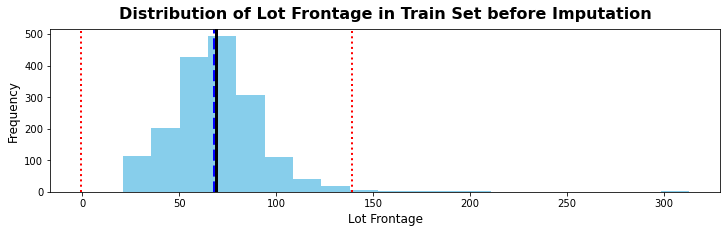

In [78]:
histogram_gen(train, "Lot Frontage","Distribution of Lot Frontage in Train Set before Imputation")

In [79]:
train.loc[train["Lot Frontage"].isnull(),["Lot Frontage"]] = train["Lot Frontage"].mean()

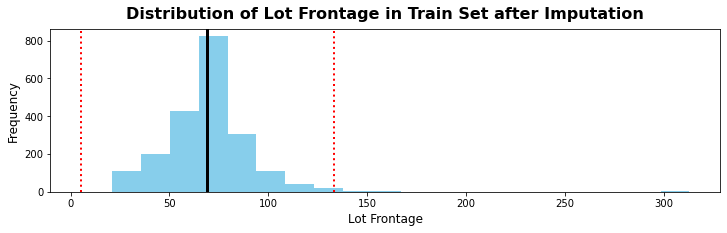

In [80]:
histogram_gen(train, "Lot Frontage","Distribution of Lot Frontage in Train Set after Imputation")

In this case: if we impute null values using a simple model, we will skew the entire shape of the distribution. Hence, have decided to rely on imputing the mean. 

As we imputed a significant number of rows for Lot Frontage, it will not be advisable to use this as a feature for modelling

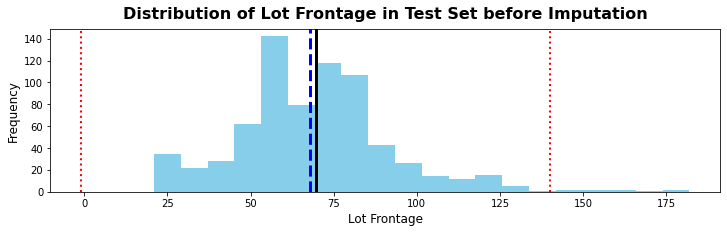

In [81]:
histogram_gen(test, "Lot Frontage","Distribution of Lot Frontage in Test Set before Imputation")

In [82]:
test.loc[test["Lot Frontage"].isnull(),["Lot Frontage"]] = test["Lot Frontage"].mean()

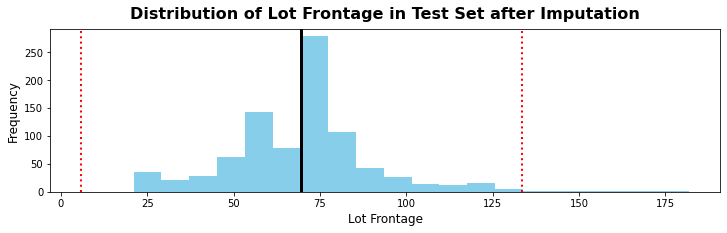

In [83]:
histogram_gen(test, "Lot Frontage","Distribution of Lot Frontage in Test Set after Imputation")

#### Null Values for Mas Vnr Area/Type

Will label null values as "None" and 0 respectively and exclude during analysis. If we have insufficient features, will revisit this.   
Expecting 22 obs for train and 1 for test, returns as expected.

In [84]:
#Before updating:

train.loc[train["Mas Vnr Type"]=="None",["Mas Vnr Area","Mas Vnr Type"]].value_counts()

Mas Vnr Area  Mas Vnr Type
0.0           None            1212
1.0           None               3
288.0         None               1
344.0         None               1
dtype: int64

In [85]:
#Before updating:

test.loc[test["Mas Vnr Type"]=="None",["Mas Vnr Area","Mas Vnr Type"]].value_counts()

Mas Vnr Area  Mas Vnr Type
0.0           None            532
285.0         None              1
312.0         None              1
dtype: int64

In [86]:
for df in [train,test]:
    null_replace_zero(df, "Mas Vnr Area")
    null_replace_na(df, "Mas Vnr Type","None")
    
#After updating:
    
train.loc[train["Mas Vnr Type"]=="None",["Mas Vnr Area","Mas Vnr Type"]].value_counts()
    

Mas Vnr Area  Mas Vnr Type
0.0           None            1234
1.0           None               3
288.0         None               1
344.0         None               1
dtype: int64

In [87]:
test.loc[test["Mas Vnr Type"]=="None",["Mas Vnr Area","Mas Vnr Type"]].value_counts()

Mas Vnr Area  Mas Vnr Type
0.0           None            533
285.0         None              1
312.0         None              1
dtype: int64

In [88]:
final_col_check = final_col_check_func(null_check(train),null_check(test),new_doc)

final_col_check[(final_col_check["null_count_test"]>0)|(final_col_check["null_count_train"]>0)]

,null_count_test,dtype_test,null_count_train,dtype_train,null_ratio_train,null_ratio_test,eq_dtype,class


In [89]:
train.isnull().sum().sum()

0

In [90]:
test.isnull().sum().sum()

0

#### Add price per area for train set (more for EDA to remove outliers)

In [91]:
train["price_per_lot_area"] = train["SalePrice"]/train["Lot Area"]
train["price_per_gr_liv_area"] = train["SalePrice"]/train["Gr Liv Area"]


In [92]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,price_per_lot_area,price_per_gr_liv_area
0,109,533352170,060,RL,69.066279,13517,Pave,No Alley,IR1,Lvl,...,No Pool,No Fence,No Misc Feat,0,3,2010,WD,130500,9.654509,88.235294
1,544,531379050,060,RL,43.000000,11492,Pave,No Alley,IR1,Lvl,...,No Pool,No Fence,No Misc Feat,0,4,2009,WD,220000,19.143752,103.675778
2,153,535304180,020,RL,68.000000,7922,Pave,No Alley,Reg,Lvl,...,No Pool,No Fence,No Misc Feat,0,1,2010,WD,109000,13.759152,103.122044
3,318,916386060,060,RL,73.000000,9802,Pave,No Alley,Reg,Lvl,...,No Pool,No Fence,No Misc Feat,0,4,2010,WD,174000,17.751479,120.498615
4,255,906425045,050,RL,82.000000,14235,Pave,No Alley,IR1,Lvl,...,No Pool,No Fence,No Misc Feat,0,3,2010,WD,138500,9.729540,95.847751


#### Add time_based features

In [93]:
def col_creator(df,feat_1,feat_2,new_feat):
    df[new_feat] = df[feat_1]-df[feat_2]
    return

In [94]:
for df in [train,test]:
    col_creator(df,"Yr Sold","Year Built","age_at_sale")
    col_creator(df,"Yr Sold","Year Remod/Add","years_since_remod")

In [95]:
year_cols = ["Yr Sold","Year Built","age_at_sale","Year Remod/Add","years_since_remod"]
train.loc[:,year_cols].head()

,Yr Sold,Year Built,age_at_sale,Year Remod/Add,years_since_remod
0,2010,1976,34,2005,5
1,2009,1996,13,1997,12
2,2010,1953,57,2007,3
3,2010,2006,4,2007,3
4,2010,1900,110,1993,17


In [96]:
test.loc[:,year_cols].head()

,Yr Sold,Year Built,age_at_sale,Year Remod/Add,years_since_remod
0,2006,1910,96,1950,56
1,2006,1977,29,1977,29
2,2006,2006,0,2006,0
3,2007,1923,84,2006,1
4,2009,1963,46,1963,46


In [97]:
for df in [train,test]:
    df["age_vs_remod"] = [i/j if j!=0 else i for i,j in zip(df['age_at_sale'],df['years_since_remod'])]
    print(df["age_vs_remod"].isnull().sum())


0
0


In [98]:
year_cols = ["Yr Sold","Year Built","age_at_sale","Year Remod/Add","years_since_remod","age_vs_remod"]

train.loc[:,year_cols].head()

,Yr Sold,Year Built,age_at_sale,Year Remod/Add,years_since_remod,age_vs_remod
0,2010,1976,34,2005,5,6.800000
1,2009,1996,13,1997,12,1.083333
2,2010,1953,57,2007,3,19.000000
3,2010,2006,4,2007,3,1.333333
4,2010,1900,110,1993,17,6.470588


In [99]:
test.loc[:,year_cols].head()

,Yr Sold,Year Built,age_at_sale,Year Remod/Add,years_since_remod,age_vs_remod
0,2006,1910,96,1950,56,1.714286
1,2006,1977,29,1977,29,1.000000
2,2006,2006,0,2006,0,0.000000
3,2007,1923,84,2006,1,84.000000
4,2009,1963,46,1963,46,1.000000


In [100]:
check_year = train.loc[:,year_cols]
check_year.isnull().sum()

Yr Sold              0
Year Built           0
age_at_sale          0
Year Remod/Add       0
years_since_remod    0
age_vs_remod         0
dtype: int64

In [101]:
check_year_test = test.loc[:,year_cols]
check_year_test.isnull().sum()

Yr Sold              0
Year Built           0
age_at_sale          0
Year Remod/Add       0
years_since_remod    0
age_vs_remod         0
dtype: int64

In [102]:
#only for the purpose of visualization, not modelling:
def remod_cat(x):
    if x==0:
        output = "No Remod"
    elif x<=10:
        output = "<10 years"
    elif x<=25:
        output = "<25 years"
    elif x<=50:
        output = "<50 years"
    else:
        output = ">50 years"
    return output
    
train["remod_cat"] = train["years_since_remod"].apply(lambda x:remod_cat(x))

train["remod_cat"].value_counts()

<10 years    691
<50 years    499
>50 years    376
<25 years    323
No Remod     161
Name: remod_cat, dtype: int64

In [103]:
train["remod_cat"].isnull().sum()

0

#### Dropping unusual observations from train dataset based on recomendation in documentation 

In [104]:
train["Gr Liv Area"].sort_values(ascending = False)

960     5642
1885    5095
616     3820
1897    3672
1035    3608
        ... 
1292     498
1643     492
1518     480
432      438
1428     334
Name: Gr Liv Area, Length: 2050, dtype: int64

In [105]:
train.drop(train.index[train["Gr Liv Area"]>5000],inplace=True)


##### EDA filters:

In [106]:
exclusion = ['Year Built','Yr Sold','PID','Year Remod/Add','Garage Yr Blt']
categorical = [col for col in final_col_check.index[(final_col_check["class"]=="Nominal")|
                                                    (final_col_check["class"]=="Ordinal")] 
                                                if col not in exclusion]
# cont = [col for col in final_col_check.index[(final_col_check["class"]=="Continuous")]
#                                                 if col!="SalePrice"]
corr_data = [col for col in final_col_check.index[(final_col_check["class"]=="Continuous")|
                                                 (final_col_check["class"]=="Discrete")] 
                                                 if col not in exclusion]

In [107]:
corr_data += ["age_at_sale","years_since_remod","age_vs_remod","price_per_gr_liv_area","Overall Qual","Overall Cond"]

In [108]:
final_col_check[(final_col_check["class"]=="Discrete")]

,null_count_test,dtype_test,null_count_train,dtype_train,null_ratio_train,null_ratio_test,eq_dtype,class
Bedroom AbvGr,0.0,int64,0,int64,0.0,0.0,True,Discrete
Bsmt Full Bath,0.0,int64,0,float64,0.0,0.0,False,Discrete
Bsmt Half Bath,0.0,int64,0,float64,0.0,0.0,False,Discrete
Fireplaces,0.0,int64,0,int64,0.0,0.0,True,Discrete
Full Bath,0.0,int64,0,int64,0.0,0.0,True,Discrete
Garage Cars,0.0,int64,0,float64,0.0,0.0,False,Discrete
Garage Yr Blt,0.0,float64,0,float64,0.0,0.0,True,Discrete
Half Bath,0.0,int64,0,int64,0.0,0.0,True,Discrete
Kitchen AbvGr,0.0,int64,0,int64,0.0,0.0,True,Discrete
Mo Sold,0.0,int64,0,int64,0.0,0.0,True,Discrete


In [109]:
final_col_check[(final_col_check["class"]=="Ordinal")]

,null_count_test,dtype_test,null_count_train,dtype_train,null_ratio_train,null_ratio_test,eq_dtype,class
Bsmt Cond,0.0,object,0,object,0.0,0.0,True,Ordinal
Bsmt Exposure,0.0,object,0,object,0.0,0.0,True,Ordinal
Bsmt Qual,0.0,object,0,object,0.0,0.0,True,Ordinal
BsmtFin Type 1,0.0,object,0,object,0.0,0.0,True,Ordinal
BsmtFin Type 2,0.0,object,0,object,0.0,0.0,True,Ordinal
Electrical,0.0,object,0,object,0.0,0.0,True,Ordinal
Exter Cond,0.0,object,0,object,0.0,0.0,True,Ordinal
Exter Qual,0.0,object,0,object,0.0,0.0,True,Ordinal
Fence,0.0,object,0,object,0.0,0.0,True,Ordinal
Fireplace Qu,0.0,object,0,object,0.0,0.0,True,Ordinal


In [110]:
len(categorical)+len(corr_data)

81

In [111]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

The original dataset has 82 variable which includes 2 identifiers and 1 dependent. We have also deducted 4 year-based features and replaced with 3 year-based features. And added 1 extra feature to both train and test, and 1 more feature to train 

### 2. Exploratory Data Analysis (EDA)

#### Histogram and Boxplots to identify SalesPrice outliers

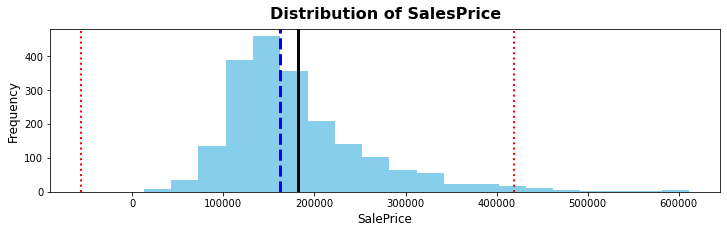

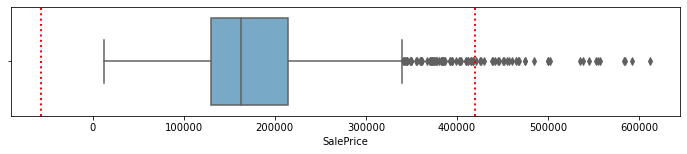

In [112]:
histogram_gen(df=train, col="SalePrice",title = "Distribution of SalesPrice")
boxplot(train,"SalePrice")

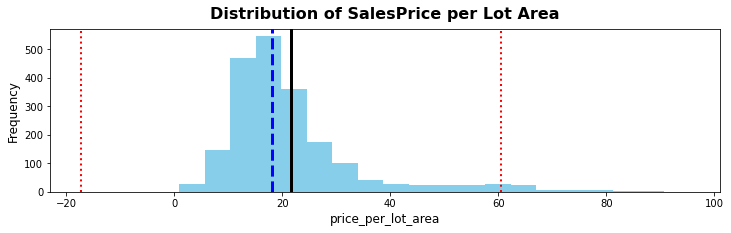

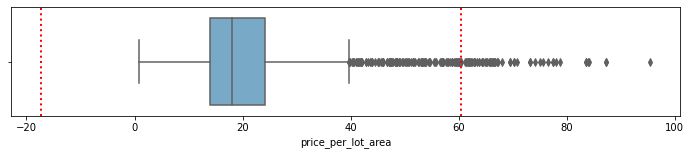

In [113]:
histogram_gen(df=train, col="price_per_lot_area",title = "Distribution of SalesPrice per Lot Area")
boxplot(train,"price_per_lot_area")

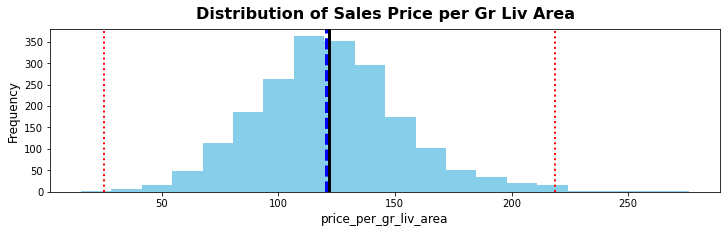

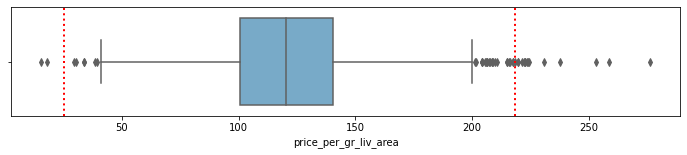

In [114]:
histogram_gen(df=train, col="price_per_gr_liv_area",title = "Distribution of Sales Price per Gr Liv Area")
boxplot(train,"price_per_gr_liv_area")


In [115]:
train['price_per_gr_liv_area'].mean()

121.79226111153056

Among the 3 histograms above, the feature with the most normal distribution and least number of outliers is that of price divided by Gr Liv Area

#### Outlier Ratio Function:

In [116]:
def outlier_ratio(df,col):
    upper_range = df[col].mean()+(3*df[col].std())
    lower_range = df[col].mean()-(3*df[col].std())
    upper_outlier = df.loc[df[col]>=upper_range,:]
    lower_outlier = df.loc[df[col]<=lower_range,:]
    total_outlier = len(upper_outlier)+len(lower_outlier)
    outliers_per_total = total_outlier/len(df)
    return outliers_per_total

In [117]:
for a in ["SalePrice","price_per_gr_liv_area","price_per_lot_area"]:
    print(f"{a}, ratio of outliers per total dataset = {outlier_ratio(train,a)}")

SalePrice, ratio of outliers per total dataset = 0.01611328125
price_per_gr_liv_area, ratio of outliers per total dataset = 0.0078125
price_per_lot_area, ratio of outliers per total dataset = 0.029296875


We don't want to remove too many observations, therefore we will remove outliers based on price per gr_liv_area.  
Outliers = observations that exceed 3 standard deviations from the mean

In [118]:
def drop_outlier(df,col):
    print(f"rows before drop = {df.shape}")
    upper_range = df[col].mean()+(3*df[col].std())
    lower_range = df[col].mean()-(3*df[col].std())
    df.drop(df.index[df[col]>=upper_range], inplace = True)
    df.drop(df.index[df[col]<=lower_range], inplace = True)
    print(f"rows after drop = {df.shape}")
    return
    

In [119]:
drop_outlier(train,"price_per_gr_liv_area")

rows before drop = (2048, 87)
rows after drop = (2032, 87)


In [120]:
#check df to make sure drops done correctly 
train.shape

(2032, 87)

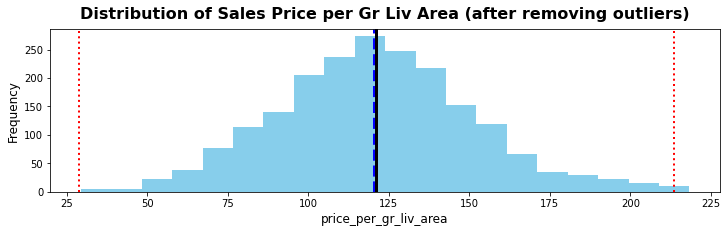

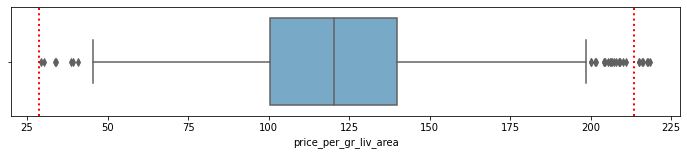

In [121]:
histogram_gen(df=train, col="price_per_gr_liv_area",title = "Distribution of Sales Price per Gr Liv Area (after removing outliers)")
boxplot(train,"price_per_gr_liv_area")

After removing outliers for the first time, the distribution would have shifted slightly again, causing new outliers to appear. 

**Plotting GR Liv Area vs SalePrice to identify if any further outliers:**

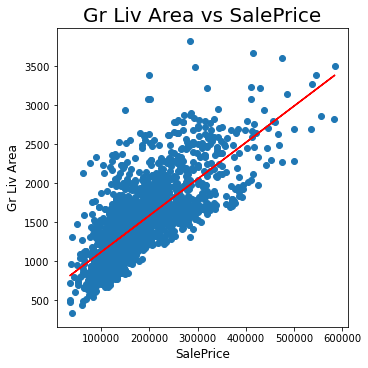

In [122]:
plt.figure(figsize = (5,5),constrained_layout=True)

create_scatter_plot(train["SalePrice"],train["Gr Liv Area"],"Gr Liv Area vs SalePrice","Gr Liv Area","SalePrice")


Data looks reasonably clean. 

#### Box Plots vs Bar Charts Subplots for Categorical Features

**Subplot Function for Box Plots vs Bar Charts:**

We would like to use:  

**Boxplots** to identify the impact of the feature on Sale Price. We will deem a feature as suitable to be used for modelling if different sub-features result in significantly different price ranges. 

**Bar charts** to determine if the features are reasonably distributed across sub-features. If distributions are heavily skewed to only one sub-feature, the other sub-features will not be sufficiently represented. 



In [123]:
def subplot_box_bar(list_of_columns, list_of_titles,list_of_titles_2):
    fig, axes = plt.subplots(nrows=len(list_of_columns), ncols=2, sharex=False, sharey=False, 
                             squeeze=True, figsize=(18,180), constrained_layout=True)
    axes = axes.ravel() 
    for i, column in enumerate(list_of_columns):
        med_order = train.groupby(column)["SalePrice"].median().sort_values().index
        sns.boxplot(x=column, y="SalePrice", data=train, orient='v',ax=axes[2*i], 
                    palette = "Blues",order=med_order)
        axes[2*i].set_title(list_of_titles[i],fontsize=15,fontweight="heavy",pad=10)
        ele_list = [str(ele) for ele in train[column].value_counts().index]
        axes[2*i+1].bar(ele_list,train[column].value_counts(),color = "indianred", 
                        edgecolor= "Black",linewidth = 1)
        axes[2*i+1].set_title(list_of_titles_2[i],fontsize=15,fontweight="heavy",pad=10)
        # ax[i].legend();
    

In [124]:
list_of_columns = categorical
list_of_titles = [(f'Distribution of Sales Price by {i}') for i in list_of_columns]
list_of_titles_2 = [(f'Frequency of Property Sold by {i}') for i in list_of_columns]

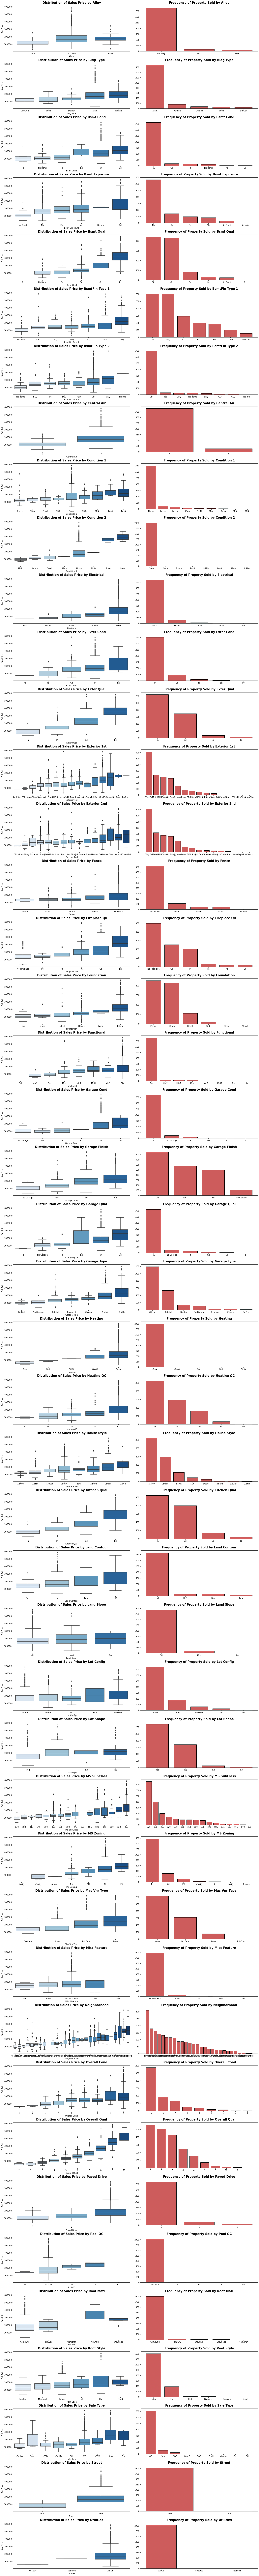

In [125]:
subplot_box_bar(list_of_columns, list_of_titles,list_of_titles_2)

#### Heatmap for Continuous Data EDA

Heatmap: 
1) Identifies continuous variables with significant correlation with price. 
2) Identifies variables with multicollinearity - we want to avoid this when modelling. 

In [126]:
for_heatmap = train.loc[:,corr_data]

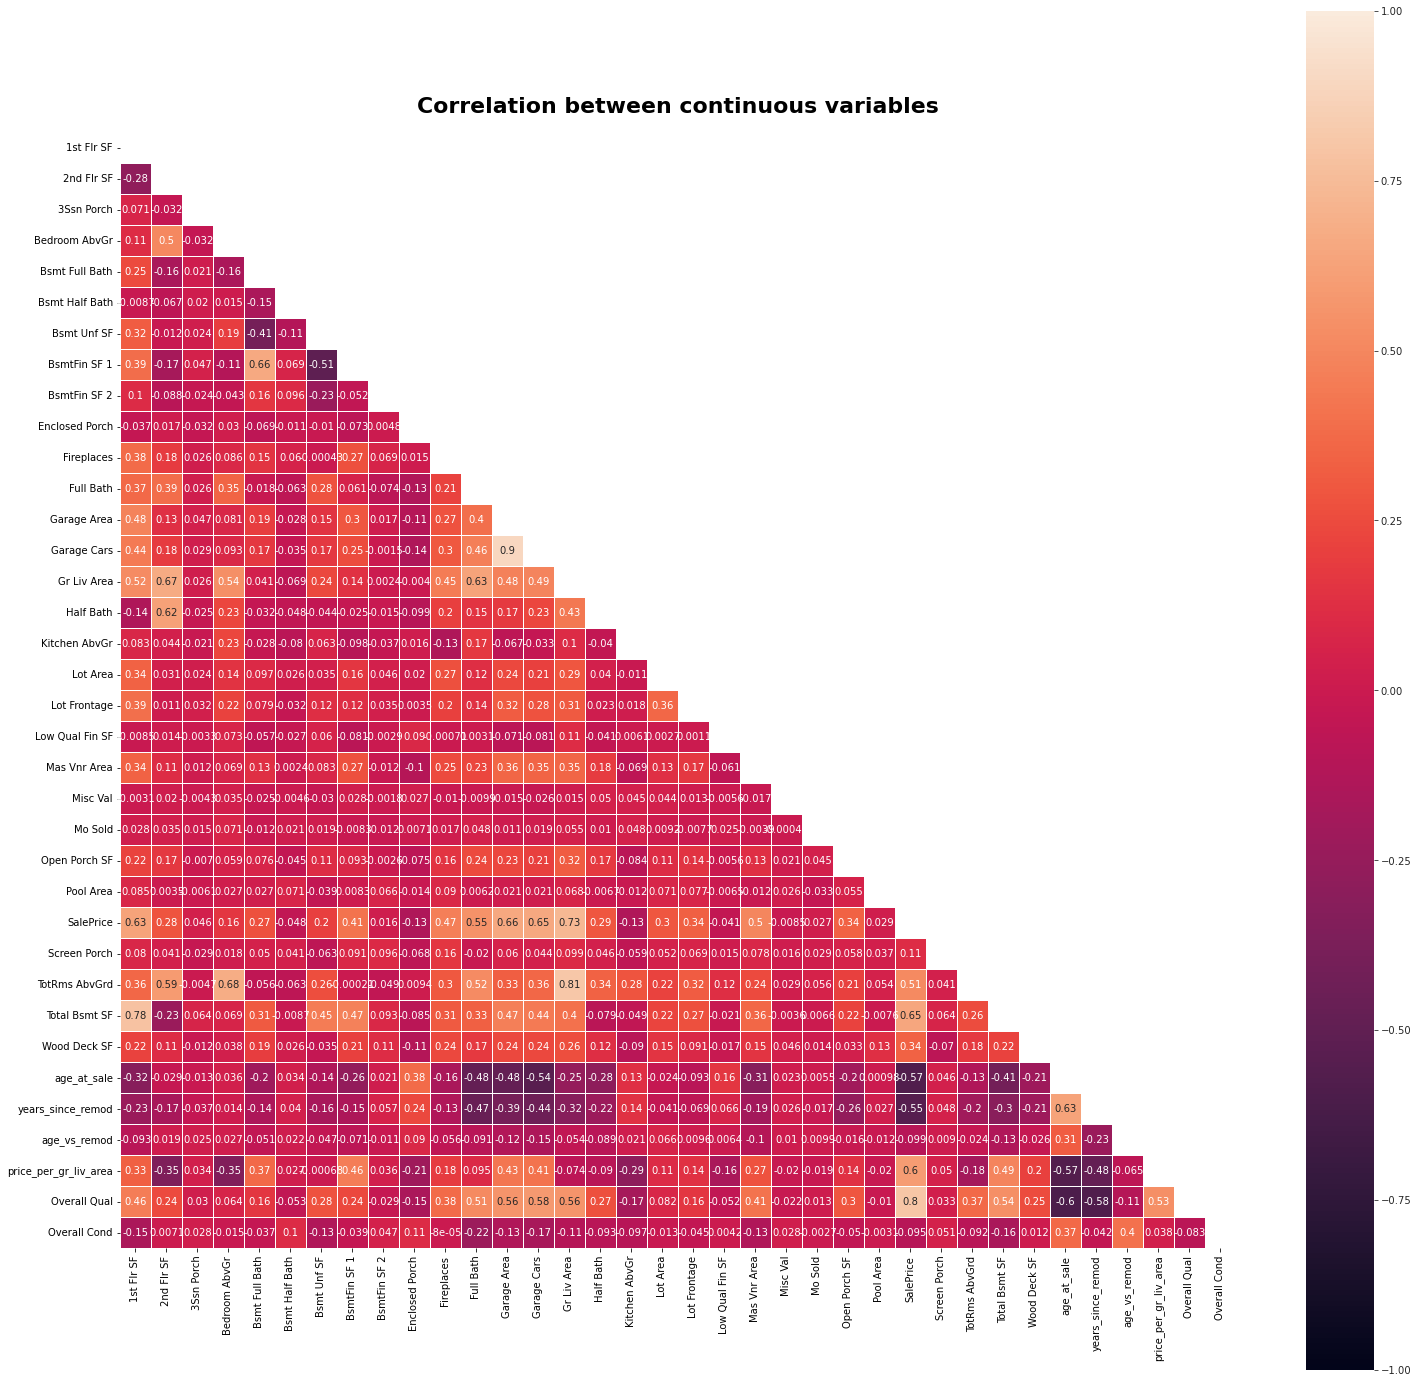

In [127]:
plt.figure(figsize = (25,25))

plt.title(label = "Correlation between continuous variables", fontsize = 22, weight = "heavy",loc = "center", pad = 20);

corr = for_heatmap.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.color_palette("Spectral", as_cmap=True)
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5);

In [128]:
ppgla = "price_per_gr_liv_area"

In [129]:
corr.loc[(corr["SalePrice"]>0.4) & (corr["SalePrice"]<1),"SalePrice"]

1st Flr SF               0.629833
BsmtFin SF 1             0.411995
Fireplaces               0.468428
Full Bath                0.548735
Garage Area              0.656022
Garage Cars              0.653788
Gr Liv Area              0.728205
Mas Vnr Area             0.495395
TotRms AbvGrd            0.511597
Total Bsmt SF            0.645762
price_per_gr_liv_area    0.598672
Overall Qual             0.801322
Name: SalePrice, dtype: float64

In [130]:
corr.index[(corr['SalePrice']>0.4) & (corr['SalePrice']<-1)]

Index([], dtype='object')

In [131]:
corr.loc[(corr["SalePrice"]>-1) & (corr["SalePrice"]<0),"SalePrice"]

Bsmt Half Bath      -0.047731
Enclosed Porch      -0.133891
Kitchen AbvGr       -0.127488
Low Qual Fin SF     -0.041314
Misc Val            -0.008512
age_at_sale         -0.574355
years_since_remod   -0.554513
age_vs_remod        -0.098632
Overall Cond        -0.094628
Name: SalePrice, dtype: float64

In [132]:
corr.index[(corr['SalePrice']>-1) & (corr['SalePrice']<-0.1)]

Index(['Enclosed Porch', 'Kitchen AbvGr', 'age_at_sale', 'years_since_remod'], dtype='object')

In [133]:
corr.index[(corr['SalePrice']>-1) & (corr['SalePrice']<-0.1)]

Index(['Enclosed Porch', 'Kitchen AbvGr', 'age_at_sale', 'years_since_remod'], dtype='object')

#### Scatter Plots:

Visualising results from the Heatmap

In [134]:
corr_data.remove("SalePrice")
corr_data

['1st Flr SF',
 '2nd Flr SF',
 '3Ssn Porch',
 'Bedroom AbvGr',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Bsmt Unf SF',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Enclosed Porch',
 'Fireplaces',
 'Full Bath',
 'Garage Area',
 'Garage Cars',
 'Gr Liv Area',
 'Half Bath',
 'Kitchen AbvGr',
 'Lot Area',
 'Lot Frontage',
 'Low Qual Fin SF',
 'Mas Vnr Area',
 'Misc Val',
 'Mo Sold',
 'Open Porch SF',
 'Pool Area',
 'Screen Porch',
 'TotRms AbvGrd',
 'Total Bsmt SF',
 'Wood Deck SF',
 'age_at_sale',
 'years_since_remod',
 'age_vs_remod',
 'price_per_gr_liv_area',
 'Overall Qual',
 'Overall Cond']

In [135]:
corr_data.remove("price_per_gr_liv_area")

In [136]:
def subplot_scatter(dataframe, scatter_columns, scatter_titles):
    fig, axes = plt.subplots(nrows=len(scatter_columns), ncols=2, sharex=False, 
                             sharey=False, squeeze=True, figsize=(18,120), 
                             constrained_layout=True)
    axes = axes.ravel() 
    for i, column in enumerate(scatter_columns): 
        x = dataframe[column]
        y = dataframe["SalePrice"]
        axes[2*i].scatter(x,y,marker=".")
        m, b = np.polyfit(x,y, 1)
        axes[2*i].plot(x, m*x+b, color = "red")
        axes[2*i].set_title(scatter_titles[i],fontsize=15,fontweight="heavy",pad=10)
        
        axes[2*i+1].hist(data=dataframe, x=column,bins=30,color="lightcoral",
                         edgecolor= "lightcoral",linewidth = 1)
        axes[2*i+1].axvline(df[column].median(), color='blue', linestyle='dashed', 
                            linewidth=3, label='median')
        axes[2*i+1].axvline(df[column].mean(), color='black', linewidth=3, label='mean')
        axes[2*i+1].axvline(df[column].mean()+(3*df[column].std()), color='red', 
                            linestyle=':', linewidth=2, label='outlier')
        axes[2*i+1].axvline(df[column].mean()-(3*df[column].std()), color='red', 
                            linestyle=':', linewidth=2, label='outlier')
        axes[2*i+1].set_title(scatter_titles_2[i],fontsize=15,fontweight="heavy",pad=10)
    
        
        

In [137]:
corr_data

['1st Flr SF',
 '2nd Flr SF',
 '3Ssn Porch',
 'Bedroom AbvGr',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Bsmt Unf SF',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Enclosed Porch',
 'Fireplaces',
 'Full Bath',
 'Garage Area',
 'Garage Cars',
 'Gr Liv Area',
 'Half Bath',
 'Kitchen AbvGr',
 'Lot Area',
 'Lot Frontage',
 'Low Qual Fin SF',
 'Mas Vnr Area',
 'Misc Val',
 'Mo Sold',
 'Open Porch SF',
 'Pool Area',
 'Screen Porch',
 'TotRms AbvGrd',
 'Total Bsmt SF',
 'Wood Deck SF',
 'age_at_sale',
 'years_since_remod',
 'age_vs_remod',
 'Overall Qual',
 'Overall Cond']

In [138]:
train['age_vs_remod'].sort_values()

1024      0.0
61        0.0
1160      0.0
867       0.0
1158      0.0
        ...  
139      98.0
1444     99.0
520     106.0
1920    107.0
28      112.0
Name: age_vs_remod, Length: 2032, dtype: float64

In [139]:
dataframe = train
scatter_columns = corr_data
scatter_titles = [(f'Effect of {i} on SalePrice') for i in scatter_columns]
scatter_titles_2 = [(f'Frequency of Property sold by {i}') for i in scatter_columns]

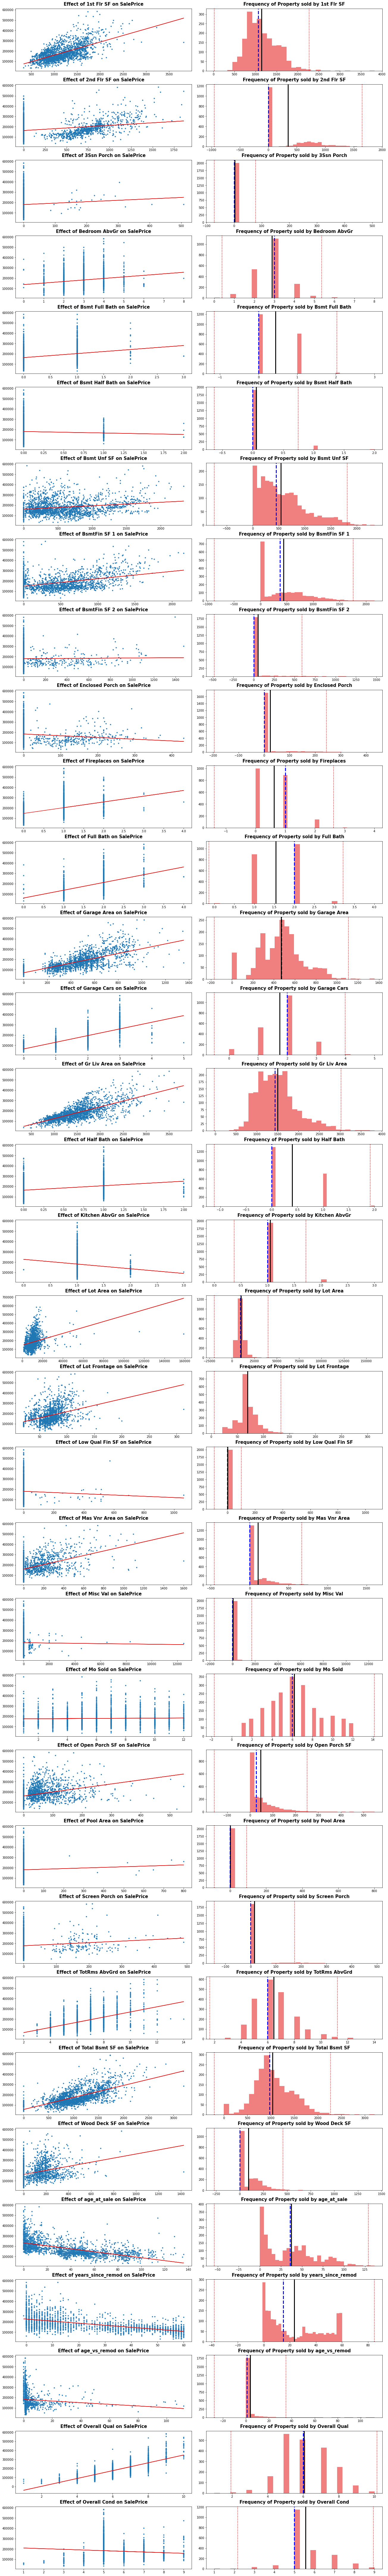

In [140]:
subplot_scatter(dataframe, scatter_columns, scatter_titles)

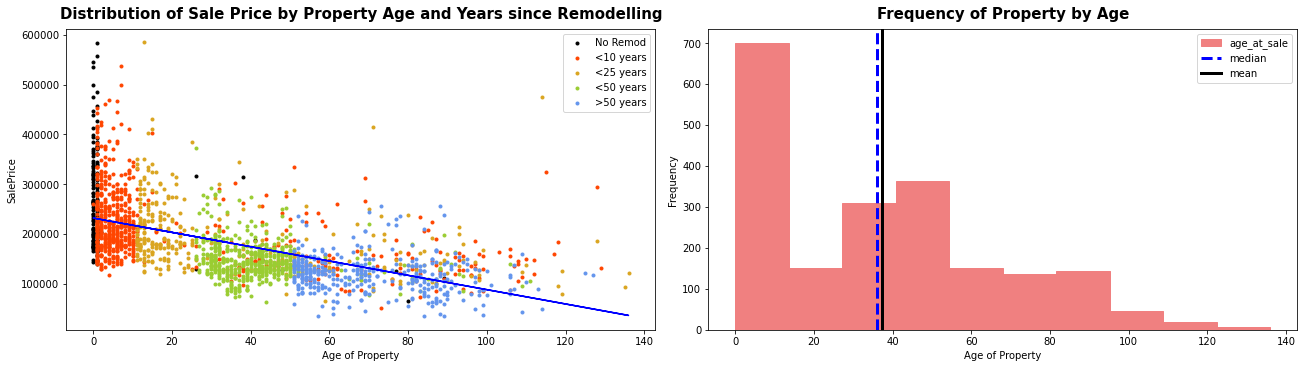

In [141]:
dataframe = train
scatter_columns = ['age_at_sale']
scatter_titles = ["Distribution of Sale Price by Property Age and Years since Remodelling"]
scatter_titles_2 = ["Frequency of Property by Age"]

def subplot_scatter_hue(dataframe, scatter_columns, scatter_titles,scatter_titles_2, result,frequency):
    fig, axes = plt.subplots(nrows=len(scatter_columns), ncols=2, sharex=False, 
                             sharey=False, squeeze=True, figsize=(18,5), 
                             constrained_layout=True)
    axes = axes.ravel() 
    for i, column in enumerate(scatter_columns): 

        colors = {'No Remod':'black', '<10 years':'orangered', '<25 years':'goldenrod','<50 years':'yellowgreen', '>50 years':'cornflowerblue', }
        for k,v in colors.items():
            x = dataframe.loc[dataframe['remod_cat']==k,column]
            y = dataframe.loc[dataframe['remod_cat']==k,[result]]
            axes[2*i].scatter(x,y,c=v,label=k,marker=".")
        axes[2*i].set(xlabel='Age of Property',ylabel='SalePrice')
        x = dataframe[column]
        y = dataframe[result]
        m, b = np.polyfit(x,y, 1)
        axes[2*i].plot(x, m*x+b, color = "blue")
        plt.xlabel('Age of Property')
        
        axes[2*i].legend(loc='upper right')
        axes[2*i].set_title(scatter_titles[i],fontsize=15,fontweight="heavy",pad=10)

        
        axes[2*i+1].hist(data=dataframe, x=frequency,bins=10,color="lightcoral",
                         edgecolor= "lightcoral",linewidth = 1)
        axes[2*i+1].axvline(df[frequency].median(), color='blue', linestyle='dashed', 
                            linewidth=3, label='median')
        axes[2*i+1].axvline(df[frequency].mean(), color='black', linewidth=3, label='mean')
        axes[2*i+1].set(xlabel='Age of Property',ylabel='Frequency')
        axes[2*i+1].set_title(scatter_titles_2[i],fontsize=15,fontweight="heavy",pad=10)
        axes[2*i+1].legend(loc='upper right')
        
subplot_scatter_hue(dataframe, scatter_columns, scatter_titles,scatter_titles_2,'SalePrice','age_at_sale')

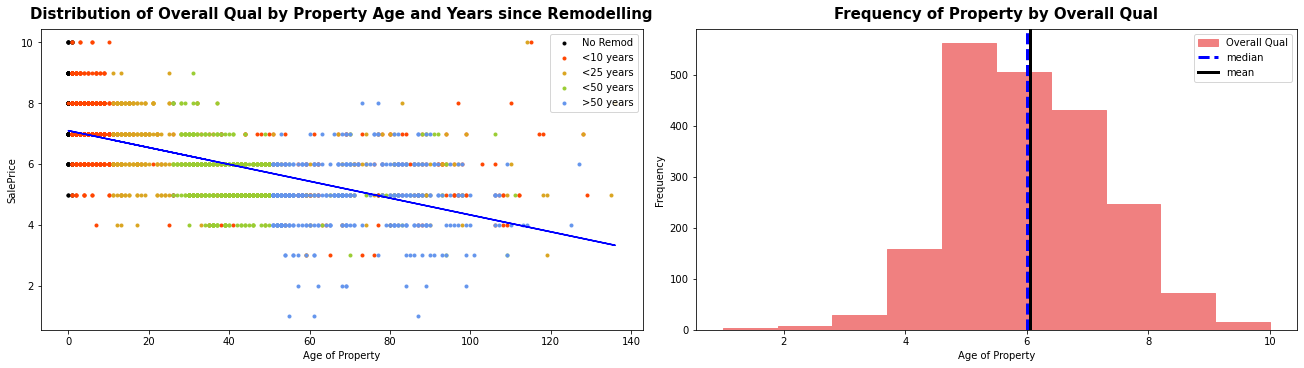

In [142]:
subplot_scatter_hue(dataframe, scatter_columns, ["Distribution of Overall Qual by Property Age and Years since Remodelling"],
                    ["Frequency of Property by Overall Qual"],'Overall Qual','Overall Qual')

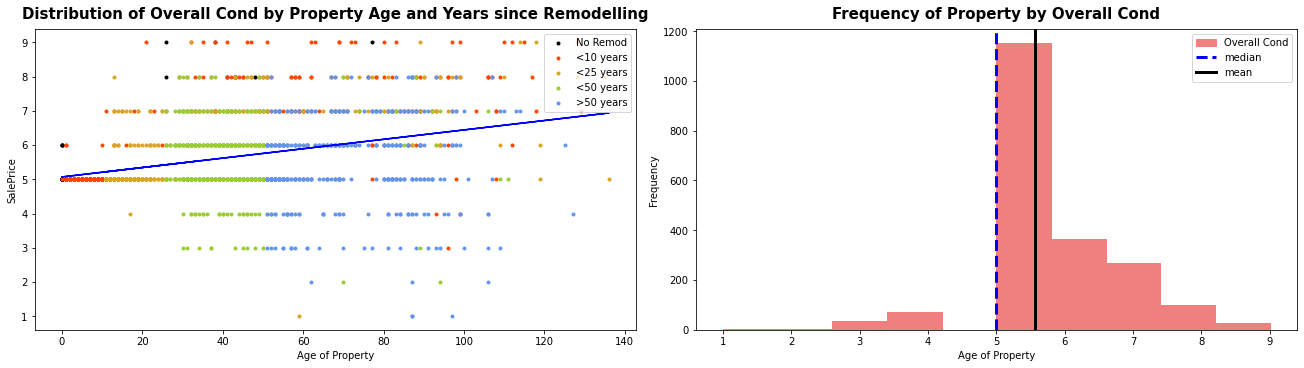

In [143]:
subplot_scatter_hue(dataframe, scatter_columns, ["Distribution of Overall Cond by Property Age and Years since Remodelling"],
                    ["Frequency of Property by Overall Cond"],'Overall Cond','Overall Cond')

In [144]:
train["years_since_remod"].value_counts()

 0     151
 1     134
 4      81
 56     81
 2      78
      ... 
 26     10
 21     10
 25      8
 24      5
-1       1
Name: years_since_remod, Length: 62, dtype: int64

In [145]:
train.loc[train["years_since_remod"]==-1,["Year Remod/Add","years_since_remod","Yr Sold"]]

,Year Remod/Add,years_since_remod,Yr Sold
1719,2008,-1,2007


In [146]:
train.loc[train["years_since_remod"]==-1,["Year Remod/Add","years_since_remod"]] = 2007,0
#overriding data since its a small adjustment without affecting other features

In [147]:
train.loc[train["years_since_remod"]==-1,["Year Remod/Add","years_since_remod","Yr Sold"]]

,Year Remod/Add,years_since_remod,Yr Sold


#### One-Hot Encoding for:

Will create all dummies first and drop one column later during the modelling stage. 

In [148]:
def one_hot_encoder(df,columns_list,to_drop):
    df = pd.get_dummies(df, columns = columns_list)
    df.drop(columns = to_drop,inplace=True)

##### 1) Exter Qual

In [149]:
train["Exter Qual"].value_counts()

TA    1245
Gd     694
Ex      68
Fa      25
Name: Exter Qual, dtype: int64

In [150]:
train = pd.get_dummies(train, columns = ['Exter Qual'])
train.drop(columns = 'Exter Qual_TA',inplace=True)

In [151]:
test = pd.get_dummies(test, columns = ['Exter Qual'])
test.drop(columns = 'Exter Qual_TA',inplace=True)

##### 2) Neighborhood

In [152]:
train["Neighborhood"].value_counts()

NAmes      310
CollgCr    179
OldTown    162
Edwards    141
Somerst    130
Gilbert    116
NridgHt    115
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     70
IDOTRR      67
NoRidge     48
Timber      48
StoneBr     34
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
Landmrk      1
GrnHill      1
Name: Neighborhood, dtype: int64

In [153]:
neighbour_dict = {n:train.loc[train["Neighborhood"]==n,["SalePrice"]].median() for n in train["Neighborhood"]}


In [154]:
nh_med = pd.DataFrame.from_dict(neighbour_dict).T.sort_values(by = "SalePrice")

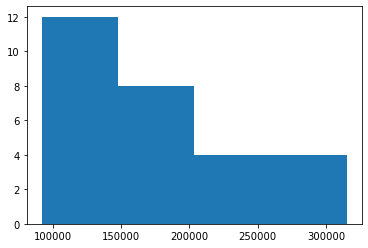

In [155]:
plt.hist(nh_med["SalePrice"],bins=4);

Based on above histogram, will combine the last 2 bins together to have a less skewed representation across categories

In [156]:
nh_med["SalePrice"].min()

92450.0

In [157]:
bin_size = (nh_med["SalePrice"].max()-nh_med["SalePrice"].min())/4
bin_size

55590.75

In [158]:
price_tier_list = ['nb_1','nb_2','nb_3']
levels = {bin_i:nh_med["SalePrice"].min()+(i*bin_size) for i,bin_i in enumerate(price_tier_list,start=0)}
levels
    

{'nb_1': 92450.0, 'nb_2': 148040.75, 'nb_3': 203631.5}

In [159]:
zone_dict = {}
zone_list = ['low_tier','mid_tier','high_tier']

def zone_dict_create(price_tier_list,zone_list):
    for i in range(len(zone_list)):
        try:
            zone_dict[zone_list[i]] = [n for n in nh_med.loc[(nh_med['SalePrice']>=levels[price_tier_list[i]])&
                                                         (nh_med['SalePrice']<levels[price_tier_list[i+1]])
                                                         ,:].index]
        except:
            zone_dict[zone_list[i]] = [n for n in nh_med.loc[(nh_med['SalePrice']>=levels[price_tier_list[i]])
                                                         ,:].index]
                 
    return zone_dict
    
zone_dict_create(price_tier_list,zone_list)
    


{'low_tier': ['MeadowV',
  'IDOTRR',
  'BrDale',
  'OldTown',
  'Edwards',
  'BrkSide',
  'Sawyer',
  'SWISU',
  'Landmrk',
  'Blueste',
  'NAmes',
  'NPkVill'],
 'mid_tier': ['Mitchel',
  'Gilbert',
  'SawyerW',
  'NWAmes',
  'Greens',
  'Blmngtn',
  'Crawfor',
  'CollgCr'],
 'high_tier': ['Timber',
  'Somerst',
  'ClearCr',
  'GrnHill',
  'Veenker',
  'StoneBr',
  'NoRidge',
  'NridgHt']}

In [160]:
def neighourhood_tier(train):
    for k,v in zone_dict.items():
        for a in train["Neighborhood"]:
            if a in v: 
                train.loc[train["Neighborhood"]==a,[k]] = 1
            else:
                train.loc[train["Neighborhood"]==a,[k]] = 0

In [161]:
neighourhood_tier(train)

In [162]:
neighourhood_tier(test)

In [163]:
def neighborhood_tier_check(train):
    sum_of_nb = 0
    for z in zone_list:
        print(train[z].value_counts())
        sum_of_nb += train[z].value_counts()[1]
    print(sum_of_nb)

In [164]:
neighborhood_tier_check(train)

0.0    1066
1.0     966
Name: low_tier, dtype: int64
0.0    1386
1.0     646
Name: mid_tier, dtype: int64
0.0    1612
1.0     420
Name: high_tier, dtype: int64
2032


In [165]:
neighborhood_tier_check(test)

0.0    473
1.0    405
Name: low_tier, dtype: int64
0.0    585
1.0    293
Name: mid_tier, dtype: int64
0.0    698
1.0    180
Name: high_tier, dtype: int64
878


In [166]:
#Create Column for visualization

new_zone_dict = {}
for k,v in zone_dict.items():
    for i in range(len(v)):
        new_zone_dict[v[i]] = k

new_zone_dict

{'MeadowV': 'low_tier',
 'IDOTRR': 'low_tier',
 'BrDale': 'low_tier',
 'OldTown': 'low_tier',
 'Edwards': 'low_tier',
 'BrkSide': 'low_tier',
 'Sawyer': 'low_tier',
 'SWISU': 'low_tier',
 'Landmrk': 'low_tier',
 'Blueste': 'low_tier',
 'NAmes': 'low_tier',
 'NPkVill': 'low_tier',
 'Mitchel': 'mid_tier',
 'Gilbert': 'mid_tier',
 'SawyerW': 'mid_tier',
 'NWAmes': 'mid_tier',
 'Greens': 'mid_tier',
 'Blmngtn': 'mid_tier',
 'Crawfor': 'mid_tier',
 'CollgCr': 'mid_tier',
 'Timber': 'high_tier',
 'Somerst': 'high_tier',
 'ClearCr': 'high_tier',
 'GrnHill': 'high_tier',
 'Veenker': 'high_tier',
 'StoneBr': 'high_tier',
 'NoRidge': 'high_tier',
 'NridgHt': 'high_tier'}

In [167]:
train["Neighborhood_cat"] = train["Neighborhood"].map(new_zone_dict)
train["Neighborhood_cat"].value_counts(normalize=True)

low_tier     0.475394
mid_tier     0.317913
high_tier    0.206693
Name: Neighborhood_cat, dtype: float64

In [168]:
color_dict = {'low_tier':'blue','mid_tier':'orange','high_tier':'green','top_tier':'red'}
new_zone_dict

color_list = [color_dict[v] for v in new_zone_dict.values()]
    

In [169]:
list_of_columns = ["Neighborhood"]
list_of_titles = ["Distribution of SalePrice by Neighborhood"]
list_of_titles_2 = ["Frequency of Properties sold by Neighborhood"]
color = ['red','blue','green','yellow']
color_dict = {'low_tier':'blue','mid-tier':'yellow','high-tier':'green','top-tier':'red'}
sublist = "Neighborhood_cat"

def subplot_box_bar_hue(list_of_columns, list_of_titles,list_of_titles_2,sublist, color,measurement):
    fig, axes = plt.subplots(nrows=len(list_of_columns), ncols=2, sharex=False, sharey=False, 
                             squeeze=True, figsize=(20,6), constrained_layout=True)
    axes = axes.ravel() 
    for i, column in enumerate(list_of_columns):
        med_order = train.groupby(column)[measurement].median().sort_values().index
        sns.boxplot(x=column, y=measurement, orient='v',ax=axes[2*i], data = train,order=med_order,hue=sublist)
        axes[2*i].set_title(list_of_titles[i],fontsize=15,fontweight="heavy",pad=10)
        axes[2*i].set_xticklabels(axes[2*i].get_xticklabels(),rotation = 45)
        axes[2*i].legend()
        

        ele_list = [str(ele) for ele in train[column].value_counts().index]
        axes[2*i+1].bar(ele_list,train[column].value_counts(),color = color_list, 
                            edgecolor= "Black",linewidth = 1)
        axes[2*i+1].set_xticklabels(axes[2*i].get_xticklabels(),rotation = 45)
        axes[2*i+1].set_title(list_of_titles_2[i],fontsize=15,fontweight="heavy",pad=10)


/var/folders/5d/j3yxq3754gb_1qyh9rgz15qm0000gn/T/ipykernel_9515/2973401025.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2*i+1].set_xticklabels(axes[2*i].get_xticklabels(),rotation = 45)


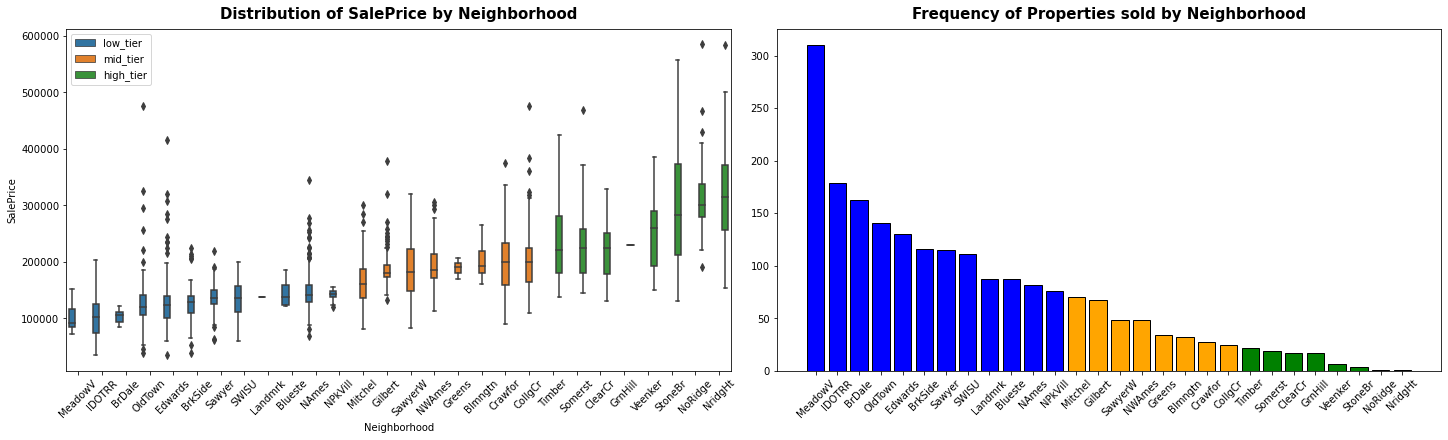

In [170]:
subplot_box_bar_hue(list_of_columns, list_of_titles,list_of_titles_2,sublist,color,"SalePrice")

In [171]:
column = "Neighborhood"
list_of_measurements = ['Gr Liv Area','age_at_sale']
list_of_titles = [f"Distribution of {col} by Neighborhood" for col in list_of_measurements]
color = ['red','blue','green','yellow']
color_dict = {'low_tier':'blue','mid-tier':'yellow','high-tier':'green','top-tier':'red'}
hue = "Neighborhood_cat"

def subplot_box_only(list_of_columns, list_of_titles,list_of_titles_2,sublist, color,list_of_measurements):
    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, 
                             squeeze=True, figsize=(20,6), constrained_layout=True)
    axes = axes.ravel() 
    for i, measurement in enumerate(list_of_measurements):
        med_order = train.groupby(column)[measurement].median().sort_values().index
        sns.boxplot(x=column, y=measurement, orient='v',ax=axes[i], data = train,order=med_order,hue=sublist)
        axes[i].set_title(list_of_titles[i],fontsize=15,fontweight="heavy",pad=10)
        axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation = 45)
        axes[i].legend()
        

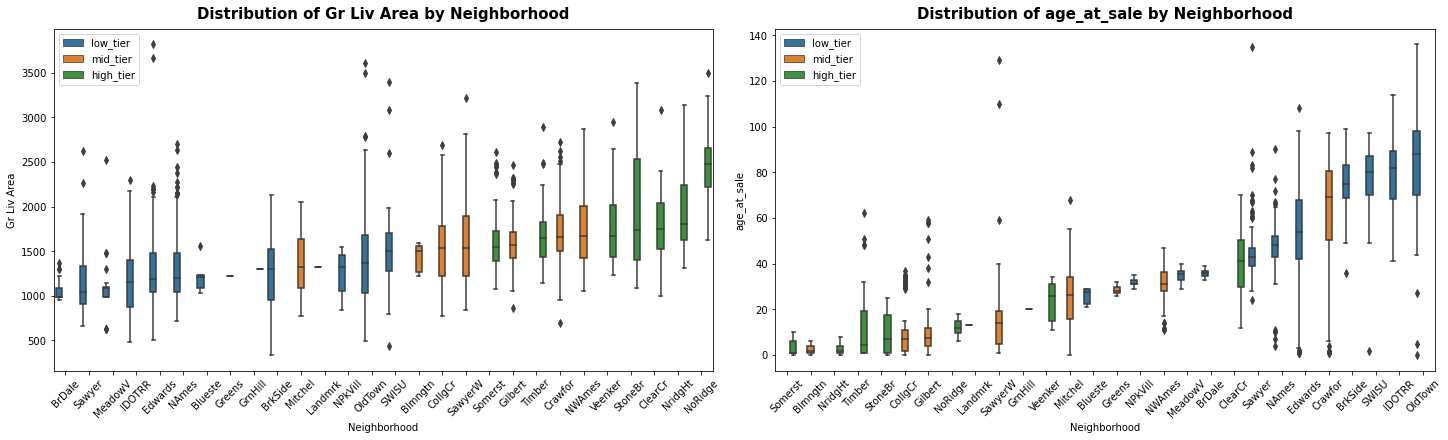

In [172]:
subplot_box_only(list_of_columns, list_of_titles,list_of_titles_2,sublist, color,list_of_measurements)

#### Exporting csv file of test and train to continue in new Notebook

In [173]:
pwd

'/Users/kenneththesheep/Documents/GA/my_materials/project_2/submission/code'

In [174]:
train.to_csv("../dataset/train_clean.csv", index=False)
test.to_csv("../dataset/test_clean.csv", index=False)